<a href="https://colab.research.google.com/github/Seungjik-Lee/Python_Deep-Learning/blob/main/Generative%20Deep%20Learning_2/Generative_Deep_Learning_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

합성곱 신경망

In [15]:
import numpy as np
import matplotlib.pyplot as plt


from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

데이터 적재

In [13]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

x_train[54, 12, 13, 1]

0.36862746

모델 만들기

In [ ]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

model.summary()

input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Sh

모델 훈련

In [14]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

model.layers[6].get_weights()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1563/1563 [==============================] - 164s 104ms/step - loss: 0.5546 - accuracy: 0.8021 - val_loss: 0.8023 - val_accuracy: 0.7313
Epoch 2/10
1563/1563 [==============================] - 162s 104ms/step - loss: 0.5208 - accuracy: 0.8168 - val_loss: 0.9230 - val_accuracy: 0.7051
Epoch 3/10
1563/1563 [==============================] - 164s 105ms/step - loss: 0.4950 - accuracy: 0.8225 - val_loss: 0.7830 - val_accuracy: 0.7450
Epoch 4/10
1563/1563 [==============================] - 163s 105ms/step - loss: 0.4776 - accuracy: 0.8319 - val_loss: 0.8207 - val_accuracy: 0.7317
Epoch 5/10
1563/1563 [==============================] - 162s 104ms/step - loss: 0.4540 - accuracy: 0.8386 - val_loss: 0.9365 - val_accuracy: 0.7101
Epoch 6/10
1563/1563 [==============================] - 162s 104ms/step - loss: 0.4379 - accuracy: 0.8468 - val_loss: 0.9506 - val_accuracy: 0.7147
Epoch 7/10
1563/1563 [==============================] - 162s 104ms/step - loss: 0.4227 - accuracy: 0.8493 - val_

[]

모델 평가

10/10 [==============================] - 7s 632ms/step - loss: 0.9796 - accuracy: 0.7134


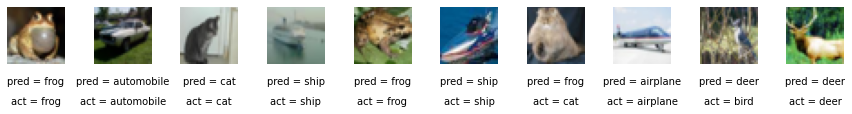

In [16]:
model.evaluate(x_test, y_test, batch_size=1000)

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)